# Petfinder.my Adoption Prediction Model

In [19]:
import pandas as pd
pd.plotting.register_matplotlib_converters()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
train_filepath = './data/train/train.csv'
train_dataset = pd.read_csv(train_filepath)

train_dataset.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [21]:
test_filepath = './data/test/test.csv'
test_dataset = pd.read_csv(test_filepath)

test_dataset.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,2,Dopey & Grey,8,266,266,1,2,6,7,1,...,2,1,2,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Dopey Age: 8mths old Male One half of a pair, ...",e2dfc2935,2.0
1,2,Chi Chi,36,285,264,2,1,4,7,2,...,1,2,1,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Please note that Chichi has been neutered, the...",f153b465f,1.0
2,2,Sticky,2,265,0,1,6,7,0,2,...,2,1,1,200,41326,e59c106e9912fa30c898976278c2e834,0,"Sticky, named such because of his tendency to ...",3c90f3f54,4.0
3,1,Dannie & Kass [In Penang],12,307,0,2,2,5,0,2,...,1,1,2,0,41326,e59c106e9912fa30c898976278c2e834,0,Dannie and Kass are mother and daughter. We en...,e02abc8a3,5.0
4,2,Cuddles,12,265,0,1,2,3,7,2,...,1,1,1,0,41326,e59c106e9912fa30c898976278c2e834,0,"Extremely cuddly cat, hence the origin of his ...",09f0df7d1,5.0


In [22]:
breed_labels = pd.read_csv('./data/breed_labels.csv')
color_labels = pd.read_csv('./data/color_labels.csv')
state_labels = pd.read_csv('./data/state_labels.csv')

state_labels.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


<Axes: xlabel='AdoptionSpeed', ylabel='count'>

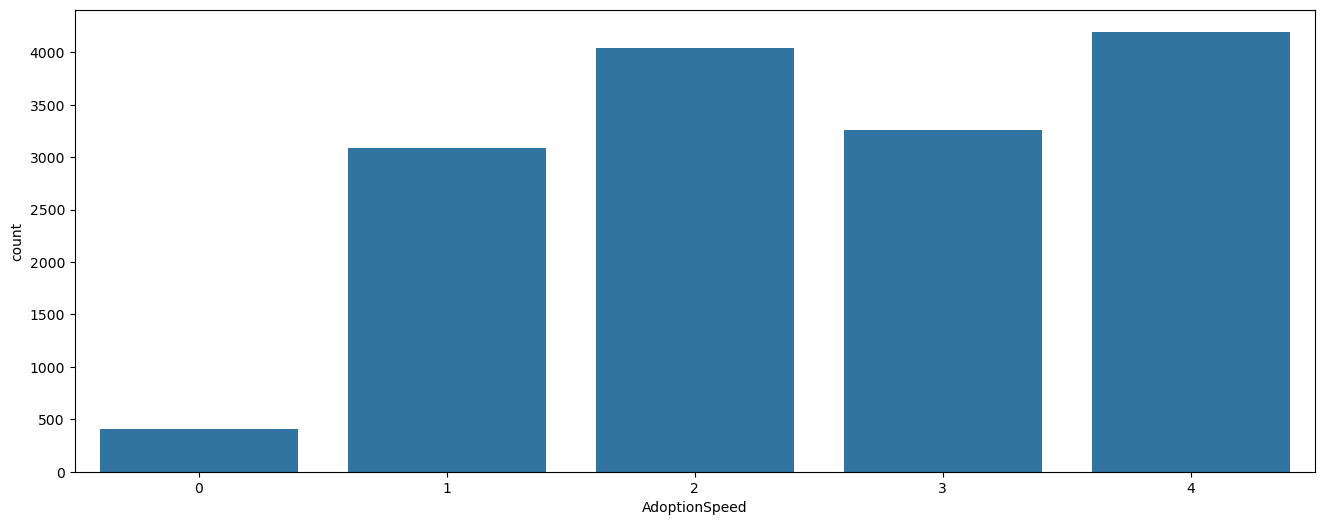

In [23]:
plt.figure(figsize=(16,6))

sns.countplot(x='AdoptionSpeed', data=train_dataset)

### Handling the sentiment data

In [24]:
# from collections import defaultdict
# import glob
# import numpy as np
# import json

# # Load and merge sentiment data
# def load_sentiment_files(file_path):
#     sentiment_dict = defaultdict(lambda: {'sentiment_score': 0, 'sentiment_magnitude': 0})
#     sentiment_files = glob.glob(file_path + '/*.json')
    
#     for file in sentiment_files:
#         with open(file, 'r') as f:
#             data = json.load(f)
#             pet_id = file.split('/')[-1].split('.')[0]
#             sentiment_dict[pet_id]['sentiment_score'] = data['documentSentiment']['score']
#             sentiment_dict[pet_id]['sentiment_magnitude'] = data['documentSentiment']['magnitude']
    
#     sentiment_df = pd.DataFrame.from_dict(sentiment_dict, orient='index').reset_index()
#     sentiment_df.rename(columns={'index': 'PetID'}, inplace=True)
#     return sentiment_df

# train_sentiment = load_sentiment_files('data/train_sentiment')
# test_sentiment = load_sentiment_files('data/test_sentiment')

# train_dataset = train_dataset.merge(train_sentiment, on='PetID', how='left')
# test_dataset = test_dataset.merge(test_sentiment, on='PetID', how='left')

# sentiment_cols = ['sentiment_score', 'sentiment_magnitude']
# train_dataset[sentiment_cols] = train_dataset[sentiment_cols].fillna(0)
# test_dataset[sentiment_cols] = test_dataset[sentiment_cols].fillna(0)


In [25]:
train_dataset.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [26]:
# Fill missing values with 0
train_dataset.fillna(0, inplace=True)
test_dataset.fillna(0, inplace=True)

train_dataset.isnull().sum()


Type             0
Name             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
RescuerID        0
VideoAmt         0
Description      0
PetID            0
PhotoAmt         0
AdoptionSpeed    0
dtype: int64

In [27]:
catetorical_colums = train_dataset.select_dtypes(include=['object', 'category']).columns

print(catetorical_colums)

Index(['Name', 'RescuerID', 'Description', 'PetID'], dtype='object')


### Handling Categorical Columns

In [28]:
# Store PassengerId for test data for final submission
test_pet_ids = test_dataset["PetID"]


all_data = pd.concat([train_dataset, test_dataset])


# rescuer_adoption_rate = all_data.groupby('RescuerID')['AdoptionSpeed'].mean()
# rescuer_adoption_rate = rescuer_adoption_rate.rename('avg_adoption_rate').reset_index()
# all_data = pd.merge(all_data, rescuer_adoption_rate, on='RescuerID', how='left')


# Description Length
all_data['DescriptionLength'] = all_data['Description'].apply(lambda x: len(str(x)))


all_data.drop(columns=['Name', 'PetID', 'RescuerID', 'Description'], inplace=True)



### Standardizing Numerical Features

In [29]:
num_columns = all_data.select_dtypes(include=['int64', 'float64']).columns

print(num_columns)

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'PhotoAmt', 'AdoptionSpeed', 'DescriptionLength'],
      dtype='object')


In [30]:
from sklearn.preprocessing import StandardScaler

num_columns = num_columns.drop('AdoptionSpeed')

scaler = StandardScaler()
all_data[num_columns] = scaler.fit_transform(all_data[num_columns])

In [31]:
#Split the data back into train and test data
train_data = all_data[all_data['AdoptionSpeed'].notnull()]
test_data = all_data[all_data['AdoptionSpeed'].isnull()]
test_data = test_data.drop('AdoptionSpeed', axis=1)

test_data.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,DescriptionLength
count,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,0.021706,0.036780,-0.021626,-0.051165,-0.007260,0.012354,0.015882,0.005717,-0.019165,-0.022193,-0.040244,-0.046267,-0.026503,0.015373,0.011290,0.005126,0.029885,-0.033283,-0.056456,-0.061413
std,1.001610,0.970870,1.002417,0.968199,1.008306,1.018197,1.000848,0.997574,1.007810,1.002808,1.009247,0.987507,1.043952,1.034682,1.015027,1.008783,1.012582,0.896648,0.973404,0.873675
min,-0.923850,-0.589702,-4.375134,-0.592839,-1.134373,-0.707027,-1.179091,-0.632641,-1.564775,-0.773878,-1.081613,-0.793126,-1.588319,-0.185866,-0.392661,-0.271864,-0.684542,-0.159324,-1.107338,-0.917328
25%,-0.923850,-0.478727,0.001193,-0.592839,-1.134373,-0.707027,-1.179091,-0.632641,0.256395,-0.773878,-1.081613,-0.793126,0.156697,-0.185866,-0.392661,-0.271864,-0.623110,-0.159324,-0.818772,-0.641372
50%,-0.923850,-0.367752,0.017833,-0.592839,0.329620,-0.707027,-0.449992,-0.632641,0.256395,-0.773878,0.412182,-0.793126,0.156697,-0.185866,-0.392661,-0.271864,-0.592394,-0.159324,-0.241641,-0.279869
75%,1.082427,0.076146,0.700074,-0.222086,0.329620,0.433417,1.008206,1.044092,0.256395,0.894106,0.412182,0.648334,0.156697,-0.185866,-0.392661,-0.271864,1.680597,-0.159324,0.335491,0.203743
max,1.082427,8.066319,0.700074,1.922544,1.793614,2.714304,1.372755,1.714785,3.898734,2.562091,1.905977,2.089794,1.901713,9.743576,12.459502,18.813685,2.110622,23.539394,7.549636,8.892906


In [32]:
from sklearn.model_selection import train_test_split

#Split the train data into features and target
X = train_data.drop('AdoptionSpeed', axis=1)
y = train_data['AdoptionSpeed']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



2024-06-27 01:06:25.300834: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 01:06:25.396532: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ileri/miniconda3/envs/tf_gpu_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=250,
    batch_size=512,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
    verbose = 1,
)

Epoch 1/250
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2122 - loss: 2.0855 - val_accuracy: 0.2794 - val_loss: 1.5764
Epoch 2/250
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2393 - loss: 1.8343 - val_accuracy: 0.3051 - val_loss: 1.5416
Epoch 3/250
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2526 - loss: 1.7467 - val_accuracy: 0.3044 - val_loss: 1.5196
Epoch 4/250
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2610 - loss: 1.6810 - val_accuracy: 0.3194 - val_loss: 1.4986
Epoch 5/250
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2808 - loss: 1.6302 - val_accuracy: 0.3394 - val_loss: 1.4830
Epoch 6/250
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2932 - loss: 1.5802 - val_accuracy: 0.3408 - val_loss: 1.4691
Epoch 7/250
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2890 - loss: 1.5542 - val_accuracy: 0.3424 - val_loss: 1.4586
Epoch 8/250
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2932 - loss: 1.5442 - val_accuracy: 0.

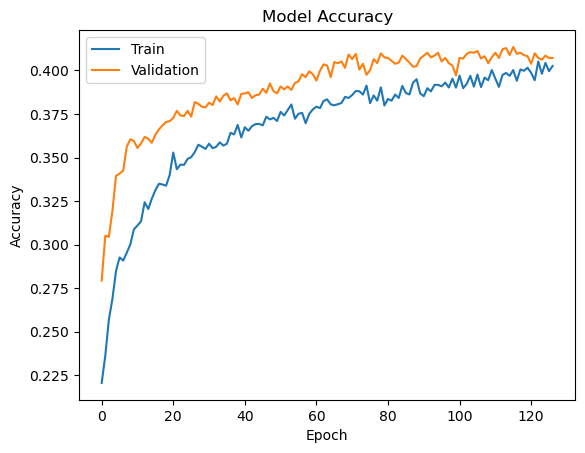

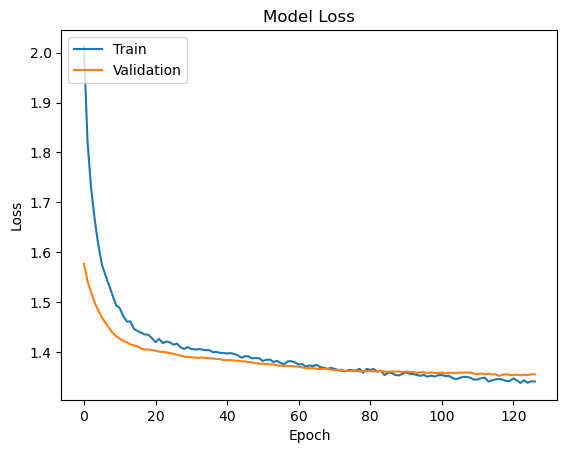

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [36]:
import numpy as np

test_data = test_data.astype(np.float32)

# Make predictions on test data
predictions = model.predict(test_data)

# Use argmax to get the predicted class (0, 1, 2, 3, or 4)
predicted_classes = np.argmax(predictions, axis=1)

submission = pd.DataFrame({
    "PetID": test_pet_ids, 
    "AdoptionSpeed": predicted_classes 
})

submission.to_csv("submission.csv", index=False)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [37]:
print(predictions[:5]) 

[[0.04210484 0.18680158 0.23350042 0.1798679  0.3577253 ]
 [0.09871915 0.14842767 0.19119439 0.20385468 0.35780415]
 [0.03403961 0.36023474 0.34637493 0.19429582 0.06505489]
 [0.00624674 0.03410712 0.19085656 0.253352   0.51543754]
 [0.0330855  0.17024775 0.2560509  0.2162765  0.3243394 ]]
